In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [18]:
df = pd.read_csv("ex2data1.txt", names=['1st exam', '2nd exam', 'status'])
df.head()

,1st exam,2nd exam,status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, '2nd exam')

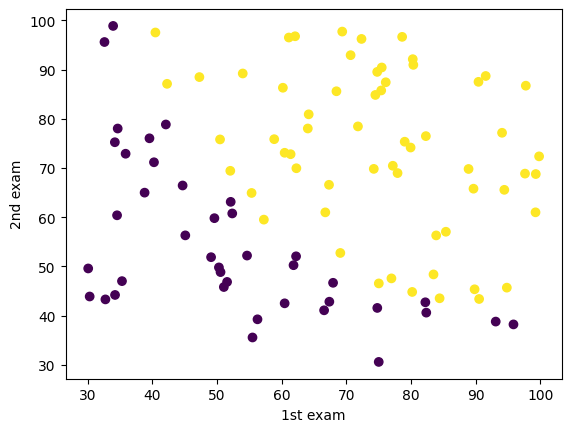

In [19]:
plt.scatter(df['1st exam'], df['2nd exam'], c = df['status'])
plt.xlabel('1st exam')
plt.ylabel('2nd exam')

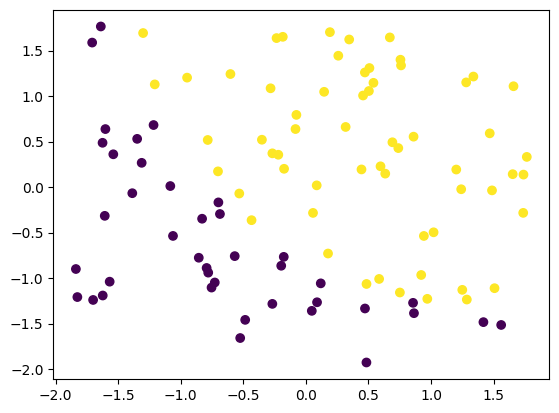

In [20]:

x = df[['1st exam', '2nd exam']].values

def normalize(x):
  std_fixed = np.zeros_like(np.std(x, axis=0))
  std_fixed[np.std(x, axis=0) == 0] = 1
  std_fixed += np.std(x, axis=0)
  return (x - np.mean(x, axis=0))/std_fixed, np.mean(x, axis=0), np.std(x, axis=0)

x, mean, std = normalize(x)
x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)

y = df['status'].values
y = y.reshape((-1, 1))
plt.scatter(x[:,1], x[:,2], c = y)

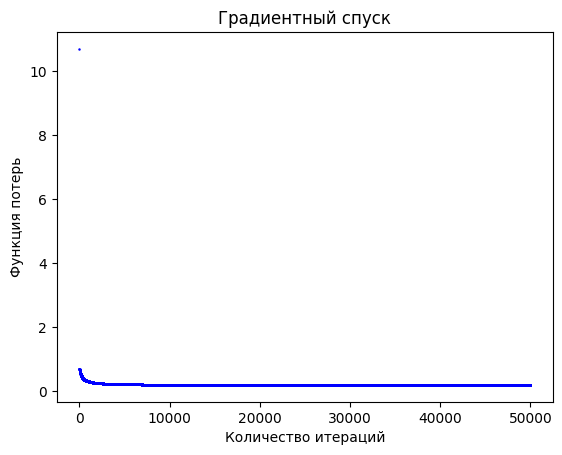

[-0.4608821] [-1.0725651]


In [21]:
def g(x):
  return 1/(1 + np.exp(-x))

def sigmoid(x, theta):
  return g(x.dot(theta))
def loss(x, y, theta):
    return (-1/y.size *(y.T.dot(np.log(sigmoid(x, theta))) + (1-y).T.dot(np.log(1-sigmoid(x, theta))))).mean()

def grad_desc(x, y, theta, a, n_iterations):
    m = y.size
    h = g(x.dot(theta))
    losses = np.zeros(n_iterations)
    last_loss = loss(x, y, theta) + 10
    for i in range(n_iterations):
        losses[i] = last_loss
        h = g(x.dot(theta))
        last_loss = loss(x, y, theta)
        gradient = x.T.dot(h - y)/y.size
        theta -= a * gradient
    return theta, losses

theta = [[0.], [0.], [0.]]

alpha = 0.01
n_iterations = 50000

theta, losses = grad_desc(x, y, theta, alpha, n_iterations)


plt.scatter(np.arange(n_iterations), losses, color='blue', s = 0.6)
plt.xlabel('Количество итераций')
plt.ylabel('Функция потерь')
plt.title('Градиентный спуск')
plt.show()
c = -theta[0]/theta[2]
m = -theta[1]/theta[2]
print(c,m)

In [25]:
print(theta)

[[1.68545283]
 [3.92238686]
 [3.65701519]]


Text(0, 0.5, '2nd exam')

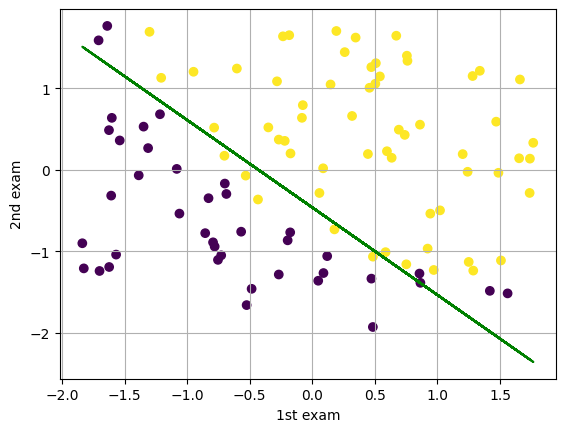

In [22]:
fig = plt.subplots()
plt.grid(True)
plt.plot(x[:,1], m*x[:,1] + c, color = 'g')
plt.scatter(x[:,1], x[:,2], c = y)
plt.xlabel('1st exam')
plt.ylabel('2nd exam')

In [23]:
x_pred = np.array([1, (45-mean[0])/std[0], (85-mean[1])/std[1]])
print(f"Предсказать, с какой вероятностью поступит абитуриент,набравший 45 баллов по первому экзамену и 85 баллов по второму. {sigmoid(x_pred, theta).mean()*100}%")

Предсказать, с какой вероятностью поступит абитуриент,набравший 45 баллов по первому экзамену и 85 баллов по второму. 77.15470543073315%


In [24]:
def accuracy(theta, x, y):
    temp = 0
    for i in range(y.size):
        if sigmoid(x[i], theta).mean().round() ==  y[i]:
            temp += 1
    return temp/y.size

print(f'Точность модели на обучающей выборке составляет {accuracy(theta, x, y)*100}%')

Точность модели на обучающей выборке составляет 89.0%


2 задание вот сейчас

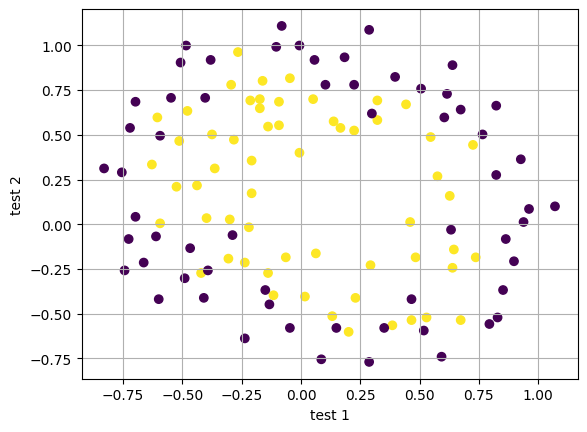

In [9]:
df = pd.read_csv("ex2data2.txt", names=['test1', 'test2', 'status'])
df.head()
plt.scatter(df['test1'], df['test2'], c = df['status'])
plt.xlabel('test 1')
plt.ylabel('test 2')
plt.grid(True)

In [10]:
x = df[['test1', 'test2']].values

def normalize(x):
  std_fixed = np.zeros_like(np.std(x, axis=0))
  std_fixed[np.std(x, axis=0) == 0] = 1
  std_fixed += np.std(x, axis=0)
  return (x - np.mean(x, axis=0))/std_fixed, np.mean(x, axis=0), np.std(x, axis=0)

poly = PolynomialFeatures(30)
x = poly.fit_transform(x)
x[:,1:], mean, std = normalize(x[:,1:])
mean = np.insert(mean, 0, 0)
std = np.insert(std, 0, 1)

y = df['status'].values
y = y.reshape((-1, 1))
y1 = y
x1 = x

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, shuffle=True)

In [12]:
def loss_reg(x, y, theta, l):
    return loss(x, y, theta) + l/(2*y.size)*(theta[1:]**2).sum()
def grad_desc(x, y, theta, a, l, n_iterations):
    m = y.size
    losses = np.zeros(n_iterations)
    for i in range(n_iterations):
        last_loss = loss_reg(x,y,theta, l)
        losses[i] = last_loss
        h = g(x.dot(theta))
        gradient = x.T.dot(h - y)/m
        theta[0] -= a*gradient[0]
        theta[1:] = theta[1:]*(1-l*a/m) - a*gradient[1:]
    return theta, losses

In [13]:
theta = np.zeros((x_train.shape[1], 1))
theta, losses = grad_desc(x_train, y_train, theta, 0.5, 0, 50000)
theta_reg = np.zeros((x_train.shape[1], 1))
theta_reg, losses_reg = grad_desc(x_train, y_train, theta_reg, 0.5, 1, 50000)

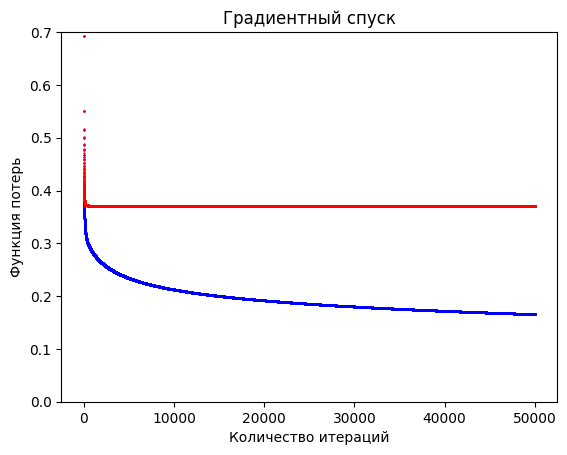

In [14]:
plt.scatter(np.arange(len(losses)), losses, color='blue', s = 0.6, label = "без регуляризации")
plt.scatter(np.arange(len(losses_reg)), losses_reg, color='red', s = 0.6, label = "c регуляризацией")
plt.xlabel('Количество итераций')
plt.ylabel('Функция потерь')
plt.title('Градиентный спуск')
plt.ylim(0, 0.7)
plt.show()

In [15]:
print(f'Точность без регуляризации на тренировочной выборке {accuracy(theta, x_train, y_train)*100}%')
print(f'Точность с регуляризацией на тренировочной выборке {accuracy(theta_reg, x_train, y_train)*100}%')
print(f'Точность без регуляризации на тестовой выборке {accuracy(theta, x_test, y_test)*100}%')
print(f'Точность с регуляризацией на тестовой выборке {accuracy(theta_reg, x_test, y_test)*100}%')

Точность без регуляризации на тренировочной выборке 92.5531914893617%
Точность с регуляризацией на тренировочной выборке 87.2340425531915%
Точность без регуляризации на тестовой выборке 79.16666666666666%
Точность с регуляризацией на тестовой выборке 83.33333333333334%


<ipython-input-5-7813927175db>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


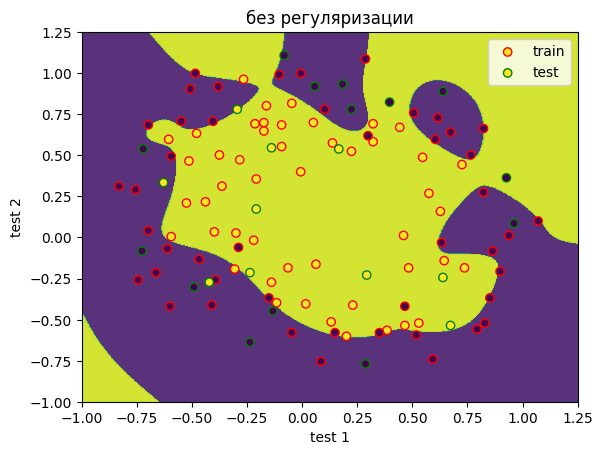

<ipython-input-5-7813927175db>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


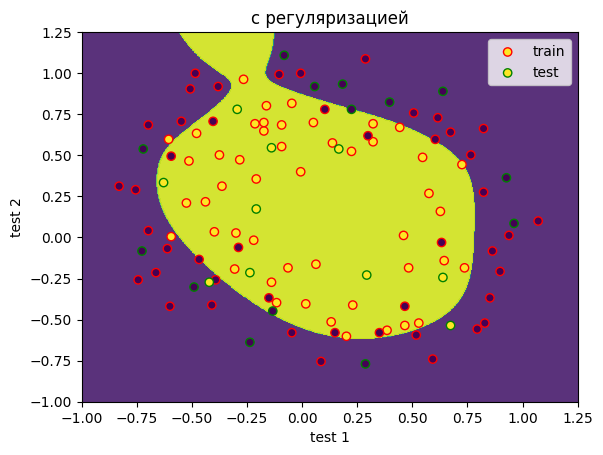

In [16]:
def plot_decision_boundary(x, y, theta, text):
    x = np.linspace(-1, 1.25, 500)
    y = np.linspace(-1, 1.25, 500)
    xx, yy = np.meshgrid(x, y)

    x_poly = poly.fit_transform(np.c_[xx.ravel(), yy.ravel()])
    x_poly[:,:]= (x_poly[:,:] - mean)/std

    Z = sigmoid(x_poly, theta)
    Z = Z.reshape(xx.shape)

    Z[Z > 0.5] = 1
    Z[Z <= 0.5] = 0

    plt.contourf(xx, yy, Z, alpha=0.9)
    X = np.copy(x_train)
    X[:,:] = X[:,:] * std + mean
    plt.scatter(X[:,1], X[:,2], c = y_train, edgecolors='red', label='train')
    X = np.copy(x_test)
    X[:,:] = X[:,:] * std + mean
    plt.scatter(X[:,1], X[:,2], c = y_test, edgecolors='green', label='test')
    plt.xlabel('test 1')
    plt.ylabel('test 2')
    plt.title(text)
    plt.legend()
    plt.show()


plot_decision_boundary(x,y, theta, "без регуляризации")
plot_decision_boundary(x,y, theta_reg, "с регуляризацией")